In [1]:
import linecache
import os
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [2]:
imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
rec_colors = (
    imfFull,
    imfTest,
    knnFull,
    knnTest,
    normalizedKnnFull,
    normalizedKnnTest,
    average,
    popularity,
    random,
)

In [3]:
ndcg = pd.read_table(
    r"C:\Projects\RecSys2020\results\figure3.txt", sep="\t", header=4, nrows=13
)
precision = pd.read_table(
    r"C:\Projects\RecSys2020\results\figure3.txt", sep="\t", header=19, nrows=13
)
recall = pd.read_table(
    r"C:\Projects\RecSys2020\results\figure3.txt", sep="\t", header=34, nrows=13
)

In [4]:
# print(ndcg)
ndcg.head()

# print(precision)
precision.head()

# print(recall)
recall.head()

,Target size,iMF (full),iMF (test),kNN (full),kNN (test),Normalized kNN (full),Normalized kNN (test),Average Rating,Popularity,Random
0,0,0.838906,0.869456,0.838846,0.840297,0.814347,0.858034,0.847034,0.793835,0.692329
1,1,0.836218,0.865772,0.835714,0.837360,0.801695,0.849059,0.830036,0.787770,0.659239
2,2,0.834011,0.860818,0.832930,0.834740,0.790447,0.839570,0.814095,0.781930,0.628886
3,5,0.826135,0.849850,0.824754,0.827300,0.759835,0.815309,0.772031,0.765785,0.550021
4,10,0.815889,0.832127,0.812447,0.815612,0.720538,0.776799,0.709859,0.741238,0.452785


In [5]:
def rank(data):
    artists = []
    colors = rec_colors  # ("red", "blue", "green", "magenta", "black", "purple", "grey", "orange")
    data.set_index("Target size")
    for i, j in data.groupby(["Target size"], axis=0):
        del j["Target size"]
        rank = j.rank(axis=1, ascending=False)
        artist = np.array(rank)[0]
        artists.append(artist)

    rank = []
    for i, t in enumerate(data.keys()[1:]):
        rank.append([t] + np.array(artists)[:, i].tolist())
    return rank


ndcg_rank = rank(ndcg)
precision_rank = rank(precision)
recall_rank = rank(recall)

In [6]:
def plot_system_rankings(data, ax, xlabel="$|N_{u}|$", ylabel=""):
    artists = []
    for row, color in zip(
        data,
        rec_colors,  # ("red", "blue", "green", "magenta", "black", "purple", "grey", "orange")
    ):
        x = list(range(len(data[0]) - 1))
        artists.append(
            plt.Line2D(xdata=x, ydata=[row[1:]], lw=1, color=color, marker="o")
        )

    for artist in artists:
        ax.add_artist(artist)

    ax.set_ybound([0.8, len(artists) + 1])
    ax.set_xbound([-0.2, 13.06])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(list(range(len(ndcg_rank[0]) - 1)))
    ax.set_xticklabels(ndcg["Target size"].array)
    # plt.xticks(list(range(len(ndcg_rank[0])-1)), ndcg['Target size'].array)
    ax.set_yticks(list(range(1, 9)))
    ax.invert_yaxis()
    ax.invert_xaxis()

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return artists


##fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='row', constrained_layout=True)
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, constrained_layout=False)

##combine_figure(precision_rank, ax2)
##combine_figure(recall_rank, ax3)
##artists = combine_figure(ndcg_rank, ax1)
##
###plt.gca().invert_yaxis()
##
##
##plt.legend(artists, np.array(ndcg_rank)[:,0], bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='x-large')
##plt.ylabel('System ranking')
##plt.xlabel('$|N_{u}|$')
##
###fig.tight_layout(h_pad=5, w_pad=5)
##
###fig.set_constrained_layout_pads(w_pad=2/72, h_pad=2/72, hspace=0.2, wspace=0.2)
##plt.show()

In [7]:
def plot_metrics(data, ax, xlabel="$|N_{u}|$", ylabel="System ranking"):
    artists = []
    for rec, color in zip(
        data.columns[1:],
        rec_colors,  # ("red", "blue", "green", "magenta", "black", "purple", "grey", "orange"),
    ):
        x = list(range(len(data[rec])))
        artists.append(
            plt.Line2D(xdata=x, ydata=[data[rec]], lw=1, color=color, marker="o")
        )

    for artist in artists:
        ax.add_artist(artist)

    max = np.array((data.max()[1:])).max()
    ax.set_ybound([0, max + max * 0.1])
    ax.set_xbound([-0.1, 13.06])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks(list(range(len(data["Target size"]))))
    ax.set_xticklabels(data["Target size"].array)
    ax.invert_xaxis()

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return artists


##fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='row', constrained_layout=True)
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, constrained_layout=False)

##plot_system_ranking(precision, ax2, 'Precision@10')
##plot_system_ranking(recall, ax3, 'Recall@10')
##artists = plot_system_ranking(ndcg, ax1, 'nDCG@10')
##
##plt.legend(artists, ndcg.columns[1:], bbox_to_anchor=(1.05, 1), loc='upper left', title='Recommender', title_fontsize='x-large')
##plt.xlabel('$|N_{u}|$')
##
##plt.show()

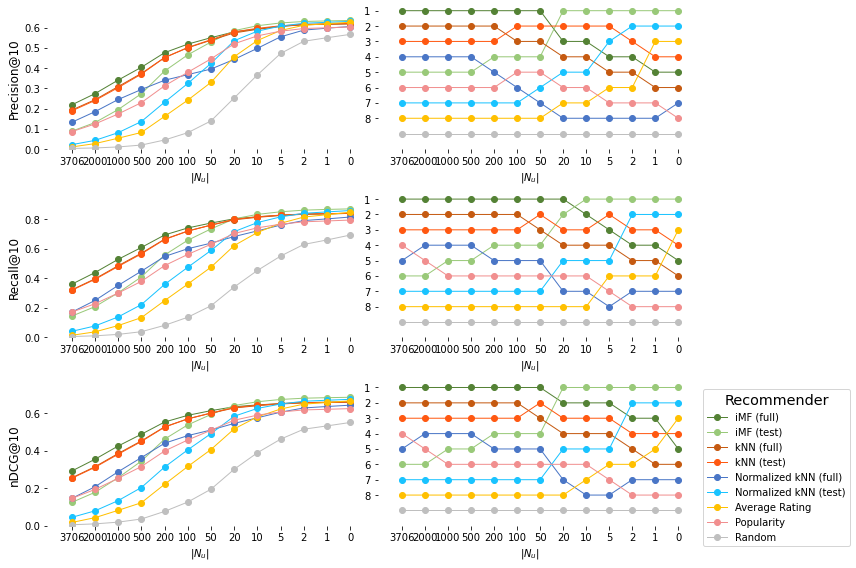

In [8]:
cols = ["Column {}".format(col) for col in range(1, 2)]
rows = ["Row {}".format(row) for row in ["Precision@10", "Recall@10", "nDCG@10"]]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# for ax, col in zip(axes[0], cols):
#    ax.set_title(col)
#    #ax.set_xlabel('|Nu|')

for ax, row in zip(axes[:, 0], rows):
    ax.set_ylabel(row, rotation=90, size="large")

plot_metrics(precision, axes[0][0], ylabel="Precision@10")
plot_metrics(recall, axes[1][0], ylabel="Recall@10")
artists = plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")

plot_system_rankings(precision_rank, axes[0][1])
plot_system_rankings(recall_rank, axes[1][1])
artists = plot_system_rankings(ndcg_rank, axes[2][1])

plt.legend(
    artists,
    ndcg.columns[1:],
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Recommender",
    title_fontsize="x-large",
)
fig.tight_layout()
plt.show()

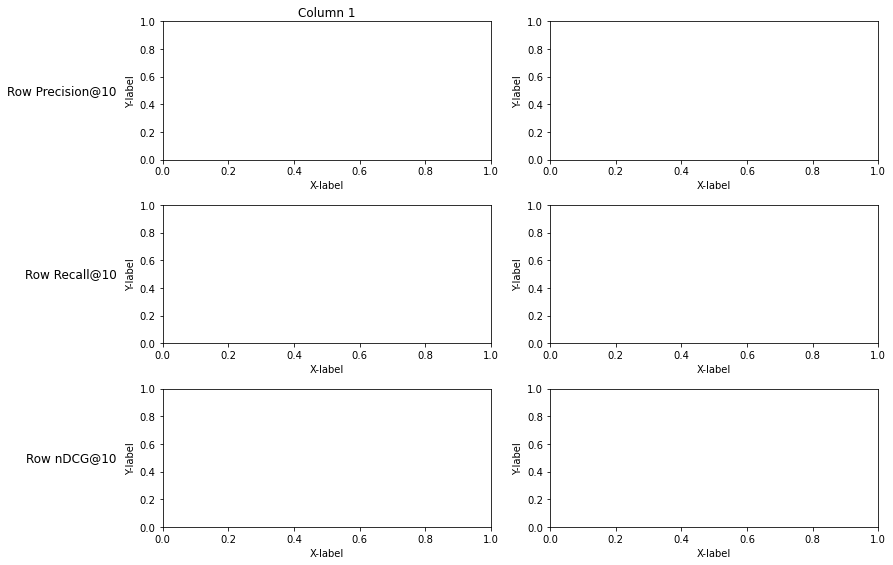

In [9]:
print('empty')
#
#from matplotlib.transforms import offset_copy
#
#cols = ["Column {}".format(col) for col in range(1, 2)]
#rows = ["Row {}".format(row) for row in ["Precision@10", "Recall@10", "nDCG@10"]]
#
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
#plt.setp(axes.flat, xlabel="X-label", ylabel="Y-label")
#
#pad = 5  # in points
#
#for ax, col in zip(axes[0], cols):
#    ax.annotate(
#        col,
#        xy=(0.5, 1),
#        xytext=(0, pad),
#        xycoords="axes fraction",
#        textcoords="offset points",
#        size="large",
#        ha="center",
#        va="baseline",
#    )
#
#for ax, row in zip(axes[:, 0], rows):
#    ax.annotate(
#        row,
#        xy=(0, 0.5),
#        xytext=(-ax.yaxis.labelpad - pad, 0),
#        xycoords=ax.yaxis.label,
#        textcoords="offset points",
#        size="large",
#        ha="right",
#        va="center",
#    )
#
#fig.tight_layout()
## tight_layout doesn't take these labels into account. We'll need
## to make some room. These numbers are are manually tweaked.
## You could automatically calculate them, but it's a pain.
#fig.subplots_adjust(left=0.15, top=0.95)
#
#plt.show()
#

In [14]:
print('empty2')
#
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import seaborn as sns
#
#sns.set_theme(style="ticks")
#
## Create a dataset with many short random walks
#rs = np.random.RandomState(4)
#pos = rs.randint(-1, 2, (6, 13)).cumsum(axis=1)
#pos -= pos[:, 0, np.newaxis]
#step = np.tile(range(13), 6)
#walk = np.repeat(range(6), 13)
#df = pd.DataFrame(np.c_[pos.flat, step, walk], columns=["position", "step", "walk"])
#
## Initialize a grid of plots with an Axes for each walk
#grid = sns.FacetGrid(
#    df, col="walk", hue="walk", palette="tab20c", col_wrap=2, height=1.5
#)
#
## Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")
#
## Draw a line plot to show the trajectory of each random walk
#grid.map(plt.plot, "step", "position", marker="o")
#
## Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3], xlim=(-0.5, 4.5), ylim=(-3.5, 3.5))
#
## Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
#plt.show()
#

empty2


In [11]:
print(np.array((recall.max()[1:])).max())

0.8694559325071411


In [12]:
def figure303(data=None, axes=None):
    precision = data["P@10"]
    recall = data["Recall@10"]
    ndcg = data["nDCG@10"]
    fscore = data["FScore@10"]

    ndcg_rank = rank(ndcg)
    precision_rank = rank(precision)
    recall_rank = rank(recall)
    fscore_rank = rank(fscore)

    cols = ["Column {}".format(col) for col in range(1, 2)]
    rows = [
        "Row {}".format(row)
        for row in ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]
    ]

    for ax, col in zip(axes[0], cols):
        ax.set_title(col)
        ax.set_xlabel("|Nu|")

    for ax, row in zip(axes[:, 0], rows):
        ax.set_ylabel(row, rotation=90, size="large")

    plot_metrics(precision, axes[0][0], ylabel="Precision@10")
    plot_metrics(recall, axes[1][0], ylabel="Recall@10")
    plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")
    artists = plot_metrics(fscore, axes[3][0], ylabel="FScore@10")

    plot_system_rankings(precision_rank, axes[0][1])
    plot_system_rankings(recall_rank, axes[1][1])
    plot_system_rankings(ndcg_rank, axes[2][1])
    artists = plot_system_rankings(fscore_rank, axes[3][1])

    plt.legend(
        artists,
        ndcg.columns[1:],
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title="Recommender",
        title_fontsize="x-large",
    )

C:\Projects\RecSys2020\results\figure303.ml1m.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml1m-male.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml1m-female.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml100k.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml100k-male.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure303.ml100k-female.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]


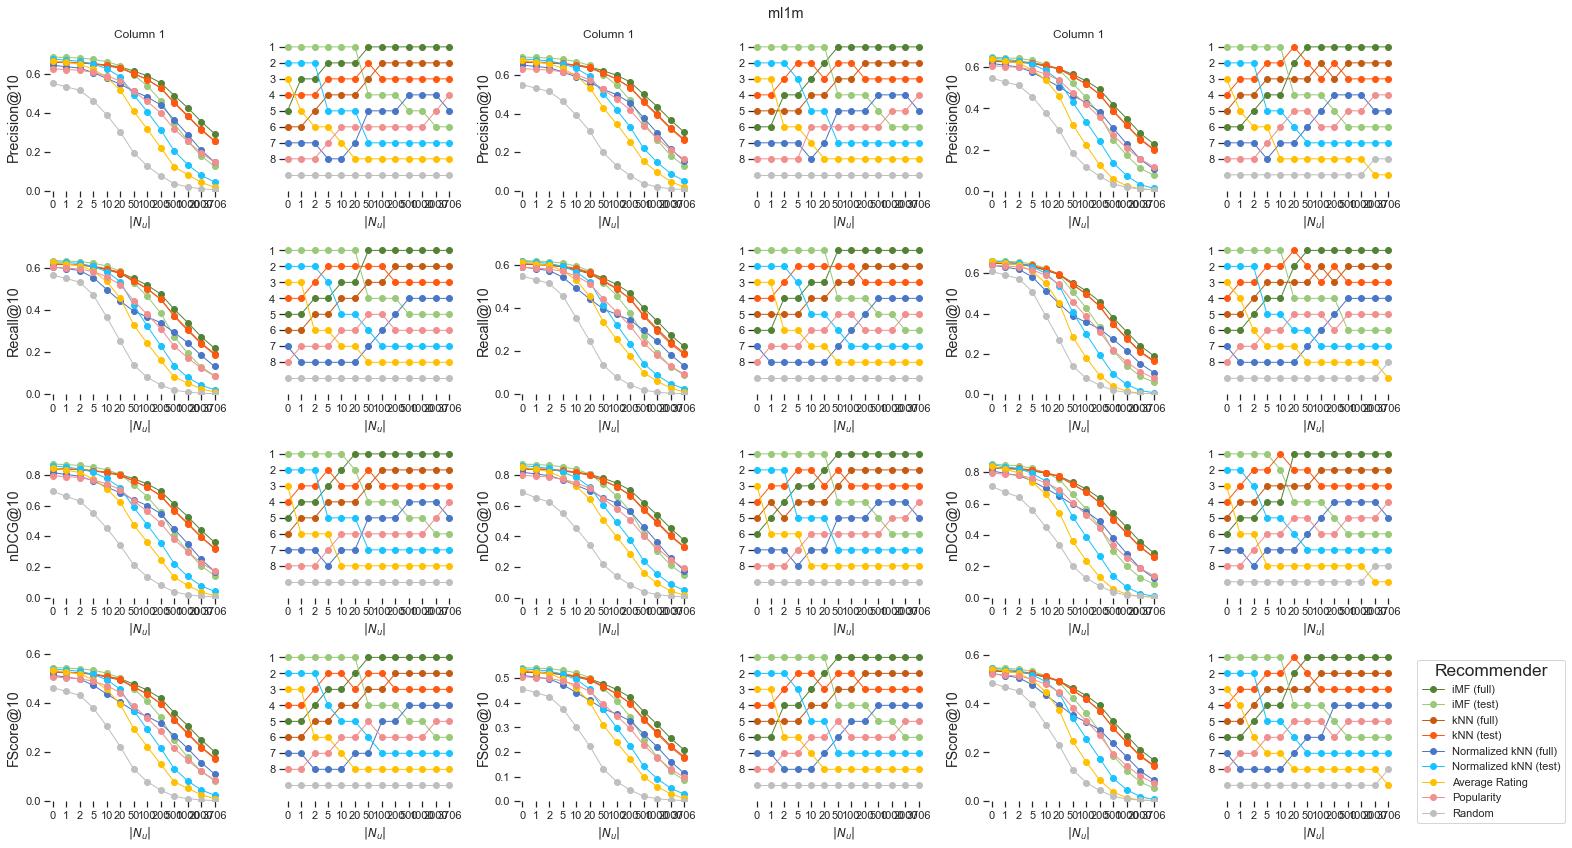

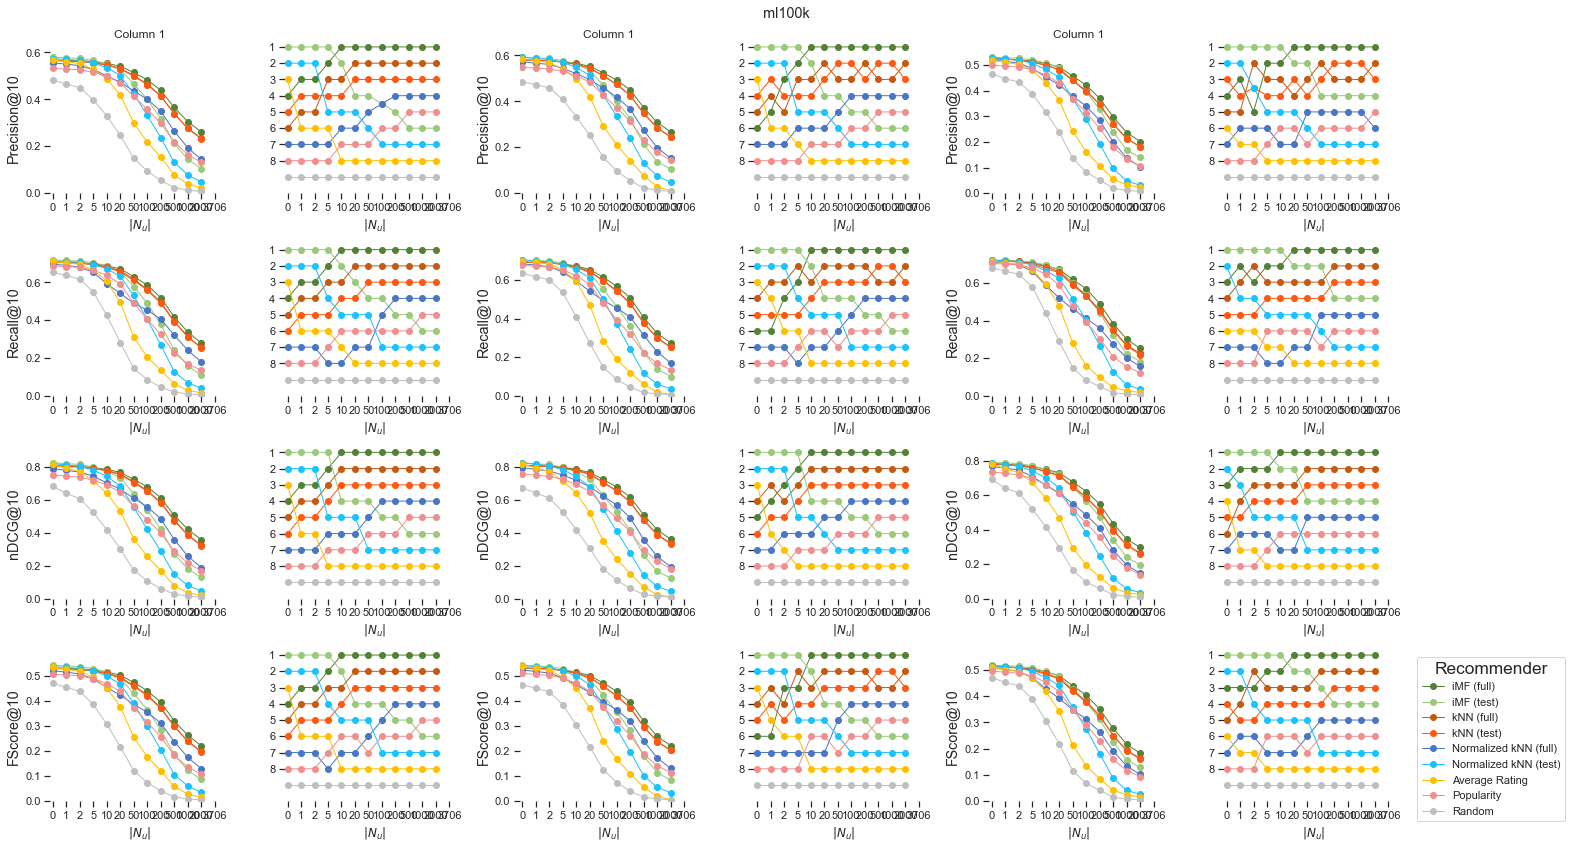

In [15]:
datasets = ["ml1m", "ml100k"]
splits = ["", "-male", "-female"]

for dataset in datasets:
    fig, axes = plt.subplots(4, 6, sharex="row")
    i = 0
    for split in splits:

        file = os.path.join(
            r"C:\Projects\RecSys2020\results", "figure303." + dataset + split + ".txt"
        )
        print(file)
        lines_with_metrics = [
            (i, linecache.getline(file, i + 1).strip())
            for i, line in enumerate(open(file))
            if line.endswith("@10\n")
        ]
        print(lines_with_metrics)
        rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
        params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
        axes[0, 0 + i].set_title(dataset + split)

        data = dict()
        for j, metric in enumerate(lines_with_metrics):
            metric_name = metric[1]
            metric_line = metric[0]
            table = pd.read_table(header=metric_line - j, **params)
            #             pp.pprint([dataset, split, metric_name, metric_line, table])
            data[metric_name] = table

        #         pp.pprint(data)
        axxx = axes[:, i : i + 2]
        figure303(data, axxx)
        plt.suptitle(dataset)
        fig.set_size_inches(22, 12)
        fig.tight_layout()
        i = i + 2
    png = os.path.join(
        r"C:\Projects\RecSys2020\results\_mbd", "figure303." + dataset + ".png"
    )
    fig.savefig(png, format="png", dpi=300)
# plt.show()